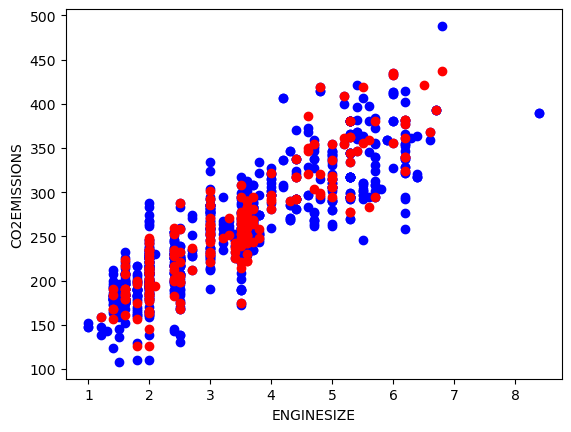

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

df=pd.read_csv(r"FuelConsumption.csv")
df.head(3)

mask=np.random.rand(len(df))<0.8
train=df[mask]
test=df[~mask]

plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color="blue")
plt.scatter(test.ENGINESIZE,test.CO2EMISSIONS,color="red")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()


In [2]:
from sklearn import linear_model
regres=linear_model.LinearRegression()
trainX=np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
trainY=np.asanyarray(train[["CO2EMISSIONS"]])
regres.fit(trainX,trainY)
print(f"Coefficients are:{regres.coef_}")

testX=np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
testY=np.asanyarray(test[["CO2EMISSIONS"]])
prediction1=regres.predict(testX)

print("Error:",np.mean(np.absolute(testY-prediction1)))
print("Variance score:",regres.score(testX,testY))

Coefficients are:[[9.83987495 8.02043128 9.60643751]]
Error: 17.161209292720464
Variance score: 0.8728579071547555


In [3]:
#Example
regres101=linear_model.LinearRegression()
train_X=np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])
train_Y=np.asanyarray(train[["CO2EMISSIONS"]])
regres101.fit(train_X,train_Y)
print(f"Coefficients are:{regres101.coef_}")

test_X=np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])
test_Y=np.asanyarray(test[["CO2EMISSIONS"]])
prediction101=regres101.predict(test_X)

print("Error:",np.mean(np.absolute(test_Y-prediction101)))
print("Variance score:",regres101.score(test_X,test_Y))

Coefficients are:[[ 9.84716229  7.98293121 -0.22202679  9.79391267]]
Error: 17.15571536153514
Variance score: 0.8730099637462282


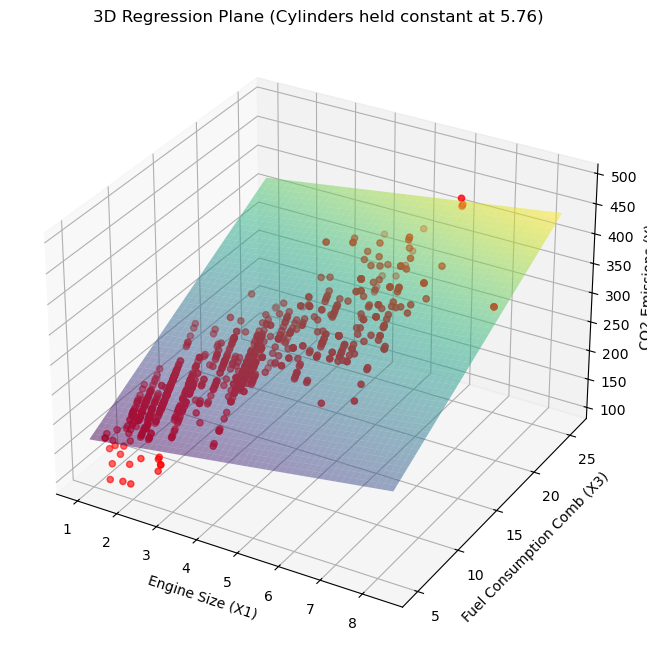

In [4]:
# --- STEP 2: 3D Plotting (Corrected) ---

# --- Fix 1: Correct Feature Assignments and Overwriting ---
# X-axis will be ENGINESIZE (Index 0 in coef_)
x_feature_scatter = np.asanyarray(train[["ENGINESIZE"]]) 
# Y-axis will be FUELCONSUMPTION_COMB (Index 2 in coef_)
y_feature_scatter = np.asanyarray(train[["FUELCONSUMPTION_COMB"]])
# Z-axis (Actual Values)
z_actual_scatter = np.asanyarray(train[["CO2EMISSIONS"]])

# Create a meshgrid to plot the surface smoothly
x_range = np.linspace(x_feature_scatter.min(), x_feature_scatter.max(), 50)
y_range = np.linspace(y_feature_scatter.min(), y_feature_scatter.max(), 50)
X, Y = np.meshgrid(x_range, y_range)

# --- Fix 2: Correctly extract intercept and coefficients ---
B0 = regres.intercept_[0]
B1 = regres.coef_[0][0] # Coefficient for ENGINESIZE (X1)
B2 = regres.coef_[0][1] # Coefficient for CYLINDERS (X2)
B3 = regres.coef_[0][2] # Coefficient for FUELCONSUMPTION_COMB (X3)

# --- Fix 3: Define the Z-Plane (Holding CYLINDERS constant) ---
# We must set the CYLINDERS feature (X2) to its MEAN value
mean_cylinders = train['CYLINDERS'].mean() 
# The equation for the plane: Z = B0 + (B1*X) + (B2*mean_X2) + (B3*Y)
Z = B0 + (B1 * X) + (B2 * mean_cylinders) + (B3 * Y)

# --- Fix 4: Ensure all scatter data comes from the same source (TRAIN set) ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D surface (the model's prediction)
ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis')

# Plot the actual data points (TRAIN data used for consistency)
ax.scatter(x_feature_scatter, y_feature_scatter, z_actual_scatter, color='red', marker='o')

ax.set_xlabel('Engine Size (X1)')
ax.set_ylabel('Fuel Consumption Comb (X3)')
ax.set_zlabel('CO2 Emissions (Y)')
ax.set_title(f'3D Regression Plane (Cylinders held constant at {mean_cylinders:.2f})')

plt.show()